<font style='color:red'>CH1. NLTK 자연어처리 패키지</font>
# 1. NLTK 패키지
1. 텍스트 전처리 : 토큰화(어절, 문장나누기), 정규화(정규표현식 활용), 불용어 제거, 표제어추출(기본형태로 변환)
2. 품사태깅 : 단어 품사 식별
3. 어휘 데이터 베이스 사용
4. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감정분석 (단점)속도가 느림
```
pip install nltk==3.7
```

In [1]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
#
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:40]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCH'

In [ ]:
# emma의 글자수, 문장수, 단어수
print('글자수 :', len(emma))

글자수 : 887071


In [ ]:
from nltk.tokenize import sent_tokenize # 문장 단위로 나눠 list로 반환
sent_tokens = sent_tokenize(emma)
print('문장수 :',len(sent_tokens))
print('%r' % sent_tokens[5])

문장수 : 7456
"Even before Miss Taylor had ceased to hold the nominal\noffice of governess, the mildness of her temper had hardly allowed\nher to impose any restraint; and the shadow of authority being\nnow long passed away, they had been living together as friend and\nfriend very mutually attached, and Emma doing just what she liked;\nhighly esteeming Miss Taylor's judgment, but directed chiefly by\nher own."


In [30]:
from nltk.tokenize import word_tokenize # 단어 단위로 나눠 list로 반환
word_tokens = word_tokenize(sent_tokens[5])
print('단어수 :',len(word_tokens))
print(word_tokens)

단어수 : 74
['Even', 'before', 'Miss', 'Taylor', 'had', 'ceased', 'to', 'hold', 'the', 'nominal', 'office', 'of', 'governess', ',', 'the', 'mildness', 'of', 'her', 'temper', 'had', 'hardly', 'allowed', 'her', 'to', 'impose', 'any', 'restraint', ';', 'and', 'the', 'shadow', 'of', 'authority', 'being', 'now', 'long', 'passed', 'away', ',', 'they', 'had', 'been', 'living', 'together', 'as', 'friend', 'and', 'friend', 'very', 'mutually', 'attached', ',', 'and', 'Emma', 'doing', 'just', 'what', 'she', 'liked', ';', 'highly', 'esteeming', 'Miss', 'Taylor', "'s", 'judgment', ',', 'but', 'directed', 'chiefly', 'by', 'her', 'own', '.']


In [39]:
from nltk.tokenize import RegexpTokenizer # 해당 정규표현식에 해당하는 word만 적용
digitRet = RegexpTokenizer('\d+')
alphaRet = RegexpTokenizer('\w+')
digits = digitRet.tokenize(sent_tokens[0])
print(digits)
words = alphaRet.tokenize(sent_tokens[0])
print(words)

['1816']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 단위)분석

In [50]:
words2 = ['sending','cooking','files','lives','crying','dying']
# 어간추출(1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
[pst.stem(word) for word in words2]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [ ]:
# 어간추출(2) - 어간 추출 중 가장 많이 쓰인다
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words2]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [53]:
# 어간추출(3) RgexpSteammer : 정규표현식에 해당하는 부분만 어간 추출
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words2]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [ ]:
# 품사태깅
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사태깅한 결과 :',tagged_list)

품사태깅한 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.')]


## 퀴즈 : emma소설안에서
1. 특수문자가 들어가지 않는 3글자 이상의 단어만 추출하여 품사태깅 (정규표현식) \w{3.}
   * ex) [('emma','명'), ('was', '동')]
2. "Emma" 단어가 몇번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오

In [132]:
# 1번
alphaRet = RegexpTokenizer('\w{3,}')
words = alphaRet.tokenize(emma)
tagged_words = pos_tag(words)
len(tagged_words)

123877

In [116]:
# 2번
emma_list = [word[1] for word in tagged_words if word[0]=='Emma']
for tag in set(emma_list):
    print('{} : {}'.format(tag,emma_list.count(tag) ))
print('Emma 총 등장 횟수 :',len(emma_list))

VBP : 4
NNPS : 2
VBN : 1
NNP : 838
VB : 5
NNS : 2
JJ : 4
RB : 1
NN : 7
VBD : 1
Emma 총 등장 횟수 : 865


In [137]:
# 3번
nouns_list = [word for word in tagged_words if word[1].find('NN') != -1]
len(set(nouns_list))

4303

In [139]:
import matplotlib.pyplot as plt
from nltk import Text
emma_text = Text(nouns_list)
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [145]:
# 고유명사
names_list = [word for word in tagged_words if word[1].find('NNP') != -1]
print('고유 명사의 갯수',len(set(names_list)))
from nltk import FreqDist
FreqDist(names_list) # 빈도를 반환 

고유 명사의 갯수 662


FreqDist({('Emma', 'NNP'): 838, ('Mrs', 'NNP'): 696, ('Miss', 'NNP'): 569, ('Harriet', 'NNP'): 483, ('Weston', 'NNP'): 433, ('Knightley', 'NNP'): 389, ('Elton', 'NNP'): 382, ('Jane', 'NNP'): 295, ('Woodhouse', 'NNP'): 293, ('Fairfax', 'NNP'): 241, ...})

In [151]:
import pandas as pd
dic = dict(FreqDist(names_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt[wordcnt >400]

Emma     NNP    838
Mrs      NNP    696
Miss     NNP    569
Harriet  NNP    483
Weston   NNP    433
dtype: int64

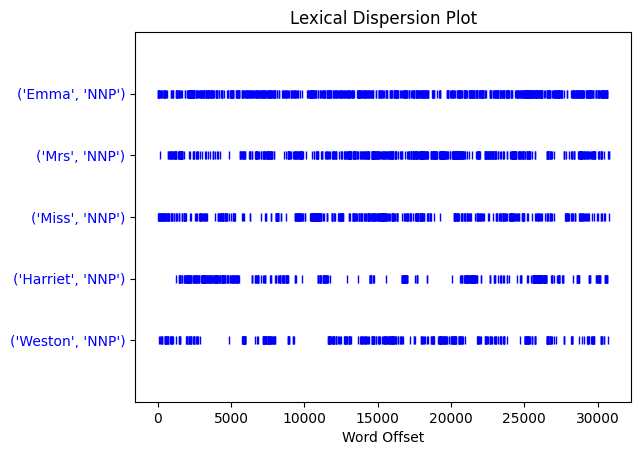

In [162]:
names = wordcnt[wordcnt>400]
names.index
emma_text.dispersion_plot(list(names.index))